### Import libraries

In [1]:
# usual libraries
import requests
import os
import time
import numpy as np 
import pandas as pd
from collections import Counter
# visualize libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#ast
import ast
#wordcloud
from wordcloud import WordCloud
# add view settings
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### 1. Parse vacancies from hh.ru and save in file

In [2]:
# Number of region: 113-all Russia, 1- Moscow, 2-St.Petersburg, 3-Ekaterinburg, 4-Novosibirsk, 88-Kazan
region_number = 113
job_title = ['Data Scientist']
# Maximum vacancies range - 30 days!
time_period = 30

In [3]:
class HHVacanciesParseWithAPI:
    def __init__(self, area_number, period=None):
        self.area_number = area_number
        self._url = 'https://api.hh.ru/vacancies'
        if period is None:
            self.period = 30
        else:
            self.period = period

    def save_vacancies_data_into_dataframe(self, vacancy_name, vacancies_list):
        vacancy_additional_details = requests.get(vacancies_list[0]['items'][0]['url']).json().keys()
        df = pd.DataFrame(columns=list(vacancy_additional_details))
        ind = 0
        for i in range(len(vacancies_list)):
            for j in range(len(vacancies_list[i]['items'])):
                additional_vacancies_data = requests.get(vacancies_list[i]['items'][j]['url']).json()
                time.sleep(0.5)
                df.loc[ind] = additional_vacancies_data
                print(f'Add info for {ind+1} vacancies into dataframe!')
                ind += 1
        csv_name = f'{vacancy_name}_{self.area_number}.csv'
        df.to_csv(csv_name, index=False)
        print(f'Save vacancies in file: {csv_name}')

    def collect_vacancies_data_into_list(self, job_name):
        try:
            vacancies_data_list = []
            common_get_request_params = {'text': job_name, 'area': self.area_number, 'period': self.period}
            vacancies_data = requests.get(self._url, params=common_get_request_params).json()
            vacancies_data_number_of_pages = vacancies_data['pages']
            for one_page in range(int(vacancies_data_number_of_pages)):
                get_request_params = {'text': job_name, 'area': self.area_number, 'period': self.period, 'page': one_page}
                vacancies_data_from_one_page = requests.get(self._url, params=get_request_params).json()
                vacancies_data_list.append(vacancies_data_from_one_page)
                print(f'Count of parsed vacancies pages: {one_page + 1}')
                time.sleep(0.5)
            self.save_vacancies_data_into_dataframe(job_name, vacancies_data_list)
        except Exception as exc:
            with open(os.path.join(os.getcwd(), 'log.txt'), 'a') as log_file:
                log_file.write(f'Happen exception {exc} with arguments {exc.args} \n')

In [4]:
vacancies_parser_obj = HHVacanciesParseWithAPI(region_number, time_period)
for one_job_name in job_title:
    vacancies_parser_obj.collect_vacancies_data_into_list(one_job_name)
    print(f'Processed {one_job_name} vacancy!')

Count of parsed vacancies pages: 1
Count of parsed vacancies pages: 2
Count of parsed vacancies pages: 3
Count of parsed vacancies pages: 4
Count of parsed vacancies pages: 5
Count of parsed vacancies pages: 6
Count of parsed vacancies pages: 7
Count of parsed vacancies pages: 8
Count of parsed vacancies pages: 9
Count of parsed vacancies pages: 10
Count of parsed vacancies pages: 11
Count of parsed vacancies pages: 12
Count of parsed vacancies pages: 13
Count of parsed vacancies pages: 14
Count of parsed vacancies pages: 15
Count of parsed vacancies pages: 16
Count of parsed vacancies pages: 17
Count of parsed vacancies pages: 18
Count of parsed vacancies pages: 19
Count of parsed vacancies pages: 20
Add info for 1 vacancies into dataframe!
Add info for 2 vacancies into dataframe!
Add info for 3 vacancies into dataframe!
Add info for 4 vacancies into dataframe!
Add info for 5 vacancies into dataframe!
Add info for 6 vacancies into dataframe!
Add info for 7 vacancies into dataframe!
Ad

Add info for 178 vacancies into dataframe!
Add info for 179 vacancies into dataframe!
Add info for 180 vacancies into dataframe!
Add info for 181 vacancies into dataframe!
Add info for 182 vacancies into dataframe!
Add info for 183 vacancies into dataframe!
Add info for 184 vacancies into dataframe!
Add info for 185 vacancies into dataframe!
Add info for 186 vacancies into dataframe!
Add info for 187 vacancies into dataframe!
Add info for 188 vacancies into dataframe!
Add info for 189 vacancies into dataframe!
Add info for 190 vacancies into dataframe!
Add info for 191 vacancies into dataframe!
Add info for 192 vacancies into dataframe!
Add info for 193 vacancies into dataframe!
Add info for 194 vacancies into dataframe!
Add info for 195 vacancies into dataframe!
Add info for 196 vacancies into dataframe!
Add info for 197 vacancies into dataframe!
Add info for 198 vacancies into dataframe!
Add info for 199 vacancies into dataframe!
Add info for 200 vacancies into dataframe!
Add info fo

Add info for 369 vacancies into dataframe!
Add info for 370 vacancies into dataframe!
Add info for 371 vacancies into dataframe!
Add info for 372 vacancies into dataframe!
Add info for 373 vacancies into dataframe!
Add info for 374 vacancies into dataframe!
Add info for 375 vacancies into dataframe!
Add info for 376 vacancies into dataframe!
Add info for 377 vacancies into dataframe!
Add info for 378 vacancies into dataframe!
Add info for 379 vacancies into dataframe!
Add info for 380 vacancies into dataframe!
Add info for 381 vacancies into dataframe!
Add info for 382 vacancies into dataframe!
Add info for 383 vacancies into dataframe!
Add info for 384 vacancies into dataframe!
Add info for 385 vacancies into dataframe!
Add info for 386 vacancies into dataframe!
Add info for 387 vacancies into dataframe!
Add info for 388 vacancies into dataframe!
Add info for 389 vacancies into dataframe!
Add info for 390 vacancies into dataframe!
Add info for 391 vacancies into dataframe!
Add info fo

### 2. Read, prepare and clear data

In [7]:
ds_vacancies_data = pd.read_csv(f'Data Scientist_113.csv')
ds_vacancies_data.head()

,id,premium,billing_type,relations,name,insider_interview,response_letter_required,area,salary,type,address,allow_messages,site,experience,schedule,employment,department,contacts,description,branded_description,vacancy_constructor_template,key_skills,accept_handicapped,accept_kids,archived,response_url,specializations,code,hidden,quick_responses_allowed,driver_license_types,accept_incomplete_resumes,employer,published_at,created_at,negotiations_url,suitable_resumes_url,apply_alternate_url,has_test,test,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary
0,41166683,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Ведущий Data Scientist,NaN,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 170000, 'to': 225000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Санкт-Петербург', 'street': 'Малая М...",True,"{'id': 'hh', 'name': 'hh.ru'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'flexible', 'name': 'Гибкий график'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,NaN,"<p>Систему СБИС придумали, создали и постоянно...","\n<style type=""text/css"">\n.tmplt_hh {\n wi...",NaN,"[{'name': 'Python'}, {'name': 'PostgreSQL'}, {...",False,False,False,NaN,"[{'id': '1.221', 'name': 'Программирование, Ра...",NaN,False,False,[],False,"{'id': '67611', 'name': 'Тензор', 'url': 'http...",2020-12-26T15:40:14+0300,2020-12-26T15:40:14+0300,NaN,NaN,https://hh.ru/applicant/vacancy_response?vacan...,False,NaN,https://hh.ru/vacancy/41166683,[],[],[],False
1,41057654,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],ML Engineer / Data Scientist,NaN,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 200000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Тверская улица',...",True,"{'id': 'hh', 'name': 'hh.ru'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,NaN,<p><strong>Адаперио - компания разработчик ком...,NaN,NaN,"[{'name': 'Анализ данных'}, {'name': 'Статисти...",False,False,False,NaN,"[{'id': '1.221', 'name': 'Программирование, Ра...",NaN,False,False,[],False,"{'id': '2845847', 'name': 'Адаперио', 'url': '...",2020-12-26T18:33:17+0300,2020-12-26T18:33:17+0300,NaN,NaN,https://hh.ru/applicant/vacancy_response?vacan...,False,NaN,https://hh.ru/vacancy/41057654,[],[],[],False
2,40794251,False,"{'id': 'standard_plus', 'name': 'Стандарт плюс'}",[],Data scientist,NaN,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 100000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Автозаводская ул...",True,"{'id': 'hh', 'name': 'hh.ru'}","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'remote', 'name': 'Удаленная работа'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,NaN,<p><strong>Если вы хотите участвовать в уникал...,NaN,NaN,"[{'name': 'Data Mining'}, {'name': 'Python'}, ...",False,False,False,NaN,"[{'id': '3.98', 'name': 'Исследования рынка', ...",NaN,False,False,[],False,"{'id': '4976751', 'name': 'Цифровая стройка', ...",2020-12-24T22:26:36+0300,2020-12-24T22:26:36+0300,NaN,NaN,https://hh.ru/applicant/vacancy_response?vacan...,False,NaN,https://hh.ru/vacancy/40794251,[],[],[],False
3,41162317,False,"{'id': 'standard', 'name': 'Стандарт'}",[],CV junior data scientist,NaN,False,"{'id': '4', 'name': 'Новосибирск', 'url': 'htt...","{'from': 100000, 'to': 120000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'проспект Андропо...",True,"{'id': 'hh', 'name': 'hh.ru'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,NaN,<p><em><strong>Health Vision</strong>- техноло...,NaN,NaN,"[{'name': 'Аналитический склад ума'}, {'name':...",False,False,False,NaN,"[{'id': '1.221', 'name': 'Программир

#### Select important columns

In [8]:
cut_ds_data = ds_vacancies_data[['employer', 'area', 'name', 'salary', 'experience', 'schedule', 'description', 'key_skills', 'published_at']].copy()
cut_ds_data.head()

,employer,area,name,salary,experience,schedule,description,key_skills,published_at
0,"{'id': '67611', 'name': 'Тензор', 'url': 'http...","{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",Ведущий Data Scientist,"{'from': 170000, 'to': 225000, 'currency': 'RU...","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'flexible', 'name': 'Гибкий график'}","<p>Систему СБИС придумали, создали и постоянно...","[{'name': 'Python'}, {'name': 'PostgreSQL'}, {...",2020-12-26T15:40:14+0300
1,"{'id': '2845847', 'name': 'Адаперио', 'url': '...","{'id': '1', 'name': 'Москва', 'url': 'https://...",ML Engineer / Data Scientist,"{'from': 200000, 'to': None, 'currency': 'RUR'...","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'fullDay', 'name': 'Полный день'}",<p><strong>Адаперио - компания разработчик ком...,"[{'name': 'Анализ данных'}, {'name': 'Статисти...",2020-12-26T18:33:17+0300
2,"{'id': '4976751', 'name': 'Цифровая стройка', ...","{'id': '1', 'name': 'Москва', 'url': 'https://...",Data scientist,"{'from': 100000, 'to': None, 'currency': 'RUR'...","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'remote', 'name': 'Удаленная работа'}",<p><strong>Если вы хотите участвовать в уникал...,"[{'name': 'Data Mining'}, {'name': 'Python'}, ...",2020-12-24T22:26:36+0300
3,"{'id': '4535346', 'name': 'Порто Механика', 'u...","{'id': '4', 'name': 'Новосибирск', 'url': 'htt...",CV junior data scientist,"{'from': 100000, 'to': 120000, 'currency': 'RU...","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'fullDay', 'name': 'Полный день'}",<p><em><strong>Health Vision</strong>- техноло...,"[{'name': 'Аналитический склад ума'}, {'name':...",2020-12-25T16:49:24+0300
4,"{'id': '4111056', 'name': 'Gradient', 'url': '...","{'id': '1', 'name': 'Москва', 'url': 'https://...",Middle/Senior Data Scientist,"{'from': 200000, 'to': None, 'currency': 'RUR'...","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'fullDay', 'name': 'Полный день'}",<p><strong>Gradient - cамый популярный фоторед...,"[{'name': 'Математическая статистика'}, {'name...",2020-12-26T16:10:39+0300


#### Modify selected data

In [9]:
cut_ds_data['published_at'] = pd.to_datetime(cut_ds_data['published_at'], dayfirst=True)
cut_ds_data['employer'] = cut_ds_data['employer'].apply(lambda x: ast.literal_eval(x)['name'])
cut_ds_data['area'] = cut_ds_data['area'].apply(lambda x: ast.literal_eval(x)['name'])
cut_ds_data['experience'] = cut_ds_data['experience'].apply(lambda x: ast.literal_eval(x)['name'])
cut_ds_data['schedule'] = cut_ds_data['schedule'].apply(lambda x: ast.literal_eval(x)['name'])
cut_ds_data['key_skills'] = cut_ds_data['key_skills'].apply(lambda x: [v for v_dict in ast.literal_eval(x) for _, v in v_dict.items()])
cut_ds_data['description'] = cut_ds_data['description'].apply(lambda x: x if x is not None and len(x)>50 else None)
cut_ds_data = cut_ds_data.replace(to_replace='None', value=np.nan).dropna(subset=['description'])
cut_ds_data.reset_index(drop=True, inplace=True)
cut_ds_data.head()
cut_ds_data.info()

,employer,area,name,salary,experience,schedule,description,key_skills,published_at
0,Тензор,Санкт-Петербург,Ведущий Data Scientist,"{'from': 170000, 'to': 225000, 'currency': 'RU...",От 1 года до 3 лет,Гибкий график,"<p>Систему СБИС придумали, создали и постоянно...","[Python, PostgreSQL, Анализ данных, C++, NLP, ...",2020-12-26 15:40:14+03:00
1,Адаперио,Москва,ML Engineer / Data Scientist,"{'from': 200000, 'to': None, 'currency': 'RUR'...",От 1 года до 3 лет,Полный день,<p><strong>Адаперио - компания разработчик ком...,"[Анализ данных, Статистический анализ, Работа ...",2020-12-26 18:33:17+03:00
2,Цифровая стройка,Москва,Data scientist,"{'from': 100000, 'to': None, 'currency': 'RUR'...",От 3 до 6 лет,Удаленная работа,<p><strong>Если вы хотите участвовать в уникал...,"[Data Mining, Python, Статистический анализ, S...",2020-12-24 22:26:36+03:00
3,Порто Механика,Новосибирск,CV junior data scientist,"{'from': 100000, 'to': 120000, 'currency': 'RU...",От 1 года до 3 лет,Полный день,<p><em><strong>Health Vision</strong>- техноло...,"[Аналитический склад ума, Информационные техно...",2020-12-25 16:49:24+03:00
4,Gradient,Москва,Middle/Senior Data Scientist,"{'from': 200000, 'to': None, 'currency': 'RUR'...",От 1 года до 3 лет,Полный день,<p><strong>Gradient - cамый популярный фоторед...,"[Математическая статистика, Математический ана...",2020-12-26 16:10:39+03:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype                                
---  ------        --------------  -----                                
 0   employer      398 non-null    object                               
 1   area          398 non-null    object                               
 2   name          398 non-null    object                               
 3   salary        49 non-null     object                               
 4   experience    398 non-null    object                               
 5   schedule      398 non-null    object                               
 6   description   398 non-null    object                               
 7   key_skills    398 non-null    object                               
 8   published_at  398 non-null    datetime64[ns, pytz.FixedOffset(180)]
dtypes: datetime64[ns, pytz.FixedOffset(180)](1), object(8)
memory usage: 28.1+ KB


### 3. Build a wordcloud from key skills

#### Count a key skills word frequency for build a wordcloud

In [10]:
bag_words = []
for vacancy_key_skills in cut_ds_data['key_skills'].values:
    for one_word in vacancy_key_skills:
        bag_words.append(one_word)

In [11]:
counter_words_dict = Counter(bag_words)
counter_words_dict.most_common(50)

[('Python', 220),
 ('SQL', 147),
 ('Data Mining', 76),
 ('Математическая статистика', 54),
 ('Анализ данных', 49),
 ('Английский язык', 41),
 ('Big Data', 32),
 ('C++', 31),
 ('Data Analysis', 28),
 ('Git', 26),
 ('MS SQL', 26),
 ('Linux', 25),
 ('Java', 23),
 ('Google Analytics', 23),
 ('Spark', 21),
 ('Математическое моделирование', 20),
 ('Статистический анализ', 17),
 ('Математический анализ', 17),
 ('MATLAB', 17),
 ('Разработка технических заданий', 17),
 ('Hadoop', 16),
 ('Data Science', 16),
 ('NLP', 15),
 ('Работа с базами данных', 13),
 ('Machine Learning', 13),
 ('Базы данных', 13),
 ('Аналитическое мышление', 13),
 ('ML', 12),
 ('R', 12),
 ('Product Management', 12),
 ('Amplitude', 12),
 ('Яндекс.Метрика', 12),
 ('Pandas', 11),
 ('machine learning', 11),
 ('TensorFlow', 11),
 ('PostgreSQL', 10),
 ('Docker', 10),
 ('MS Access', 10),
 ('Advertising', 10),
 ('Обучение и развитие', 9),
 ('ETL', 9),
 ('Google AdWords', 9),
 ('Internet Marketing', 9),
 ('ORACLE', 8),
 ('Математиче

In [12]:
mc = sorted(counter_words_dict.items(), key=lambda k_v: k_v[1], reverse=True)[:50]

In [13]:
mc_dict = {one_row[0] : one_row[1] for one_row in mc}
mc_dict

{'Python': 220,
 'SQL': 147,
 'Data Mining': 76,
 'Математическая статистика': 54,
 'Анализ данных': 49,
 'Английский язык': 41,
 'Big Data': 32,
 'C++': 31,
 'Data Analysis': 28,
 'Git': 26,
 'MS SQL': 26,
 'Linux': 25,
 'Java': 23,
 'Google Analytics': 23,
 'Spark': 21,
 'Математическое моделирование': 20,
 'Статистический анализ': 17,
 'Математический анализ': 17,
 'MATLAB': 17,
 'Разработка технических заданий': 17,
 'Hadoop': 16,
 'Data Science': 16,
 'NLP': 15,
 'Работа с базами данных': 13,
 'Machine Learning': 13,
 'Базы данных': 13,
 'Аналитическое мышление': 13,
 'ML': 12,
 'R': 12,
 'Product Management': 12,
 'Amplitude': 12,
 'Яндекс.Метрика': 12,
 'Pandas': 11,
 'machine learning': 11,
 'TensorFlow': 11,
 'PostgreSQL': 10,
 'Docker': 10,
 'MS Access': 10,
 'Advertising': 10,
 'Обучение и развитие': 9,
 'ETL': 9,
 'Google AdWords': 9,
 'Internet Marketing': 9,
 'ORACLE': 8,
 'Математическое программирование': 8,
 'Бизнес-анализ': 8,
 'SEO': 8,
 'Tableau': 7,
 'MS PowerPoint

#### Plot a WordCloud with most important Data Scientist key skills

<Figure size 2160x2160 with 0 Axes>

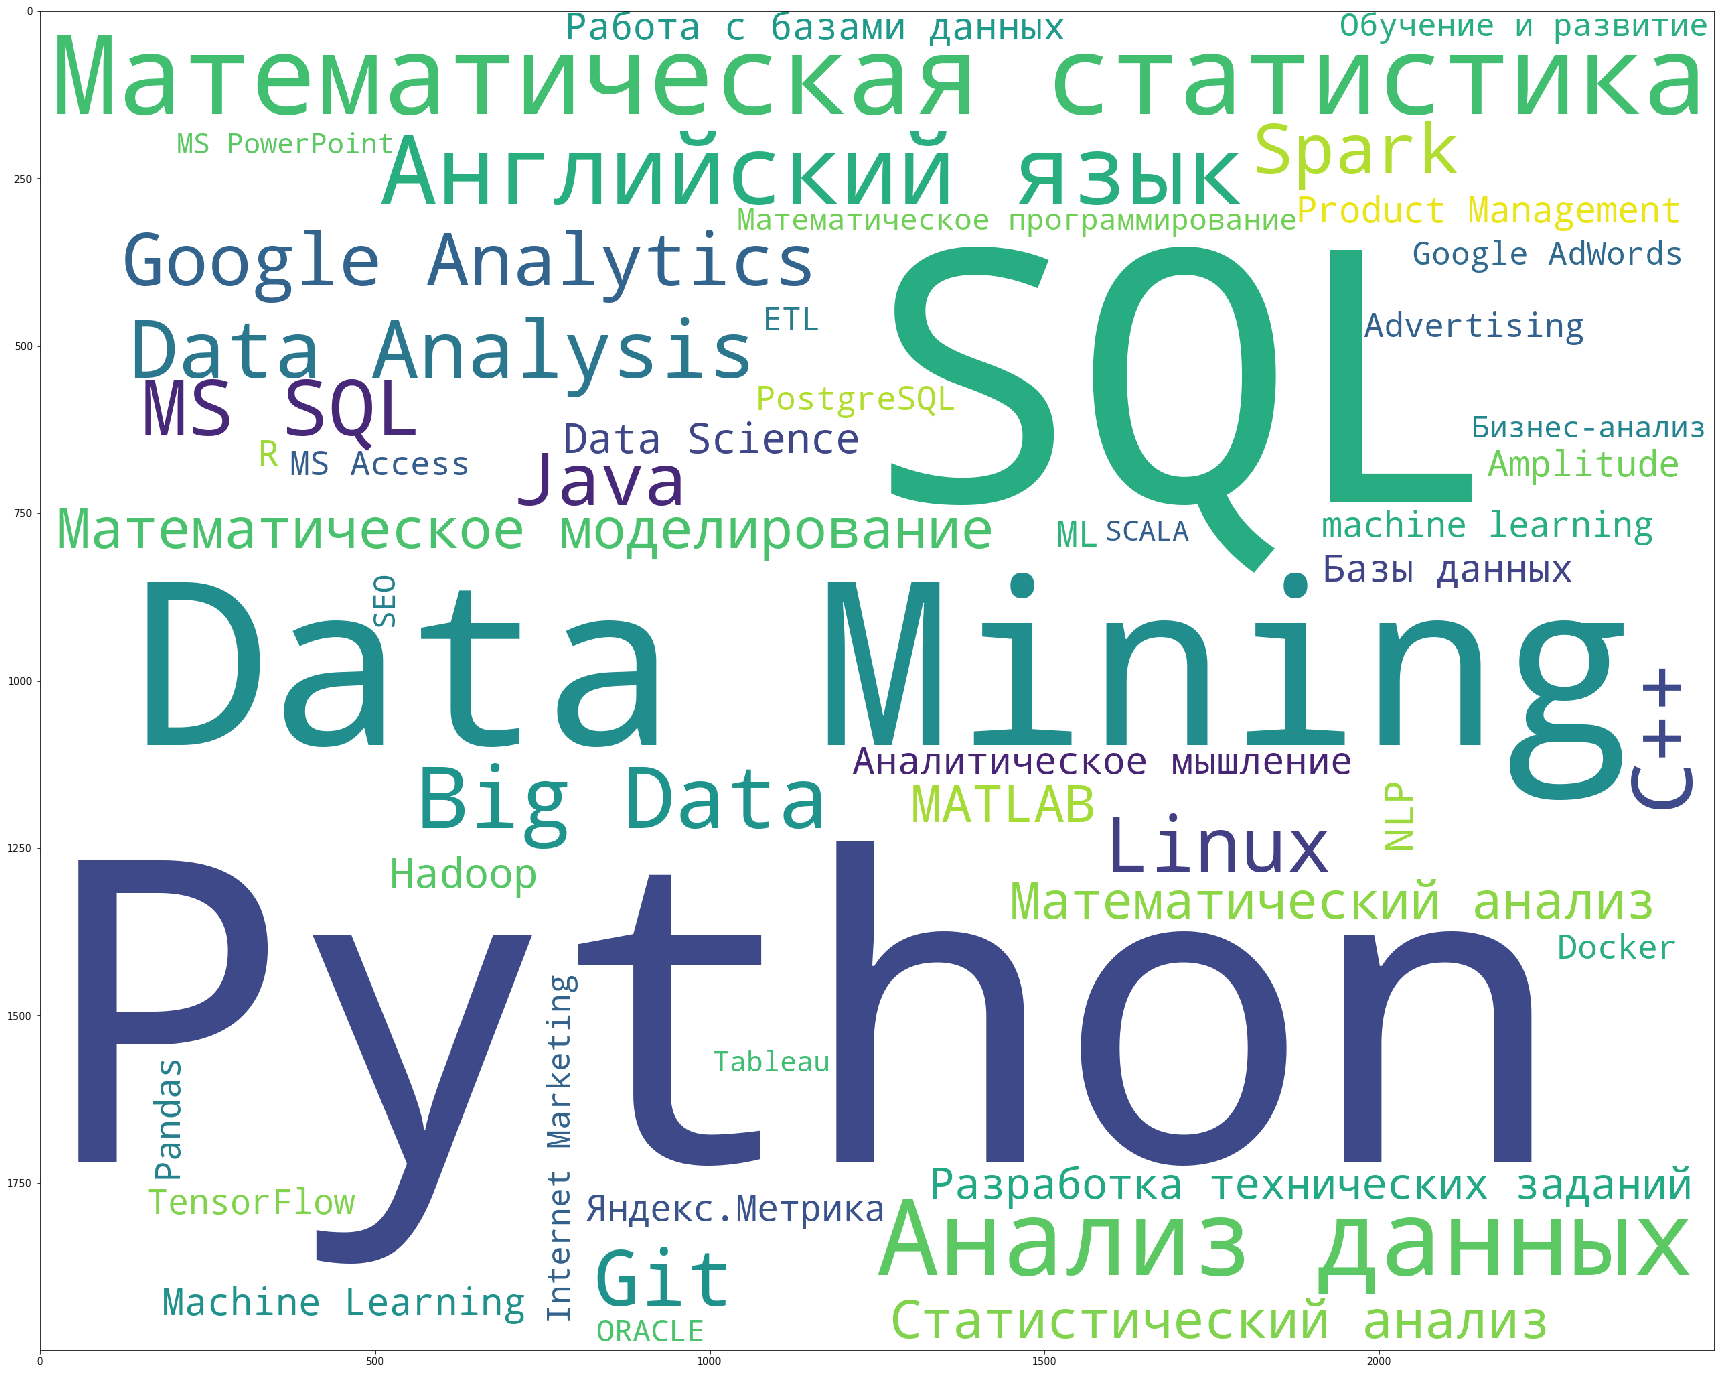

In [14]:
wordcloud = WordCloud(width = 2500, height = 2000, min_font_size = 8, background_color='white').generate_from_frequencies(mc_dict)
plt.figure(figsize = (30, 30)) 
plt.imshow(wordcloud)
plt.savefig('data_scientist_top_50_skills.pdf')

### 4. Compute median Data Scientist salary in rubles for most biggest cities.

#### Select the biggest cities for computing median salary by city

In [15]:
ds_ekb_data = cut_ds_data[cut_ds_data['area']=='Екатеринбург'].copy()
ds_kazan_data = cut_ds_data[(cut_ds_data['area']=='Казань') | (cut_ds_data['area']=='Иннополис')].copy()
ds_nn_data = cut_ds_data[cut_ds_data['area']=='Нижний Новгород'].copy()
ds_novosib_data = cut_ds_data[cut_ds_data['area']=='Новосибирск'].copy()
ds_spb_data = cut_ds_data[cut_ds_data['area']=='Санкт-Петербург'].copy()
ds_msk_data = cut_ds_data[cut_ds_data['area']=='Москва'].copy()
city_ds_data_dict = {'Ekaterinburg':ds_ekb_data, 'Kazan':ds_kazan_data, 'N.Novgorod':ds_nn_data, 'Novosibirsk':ds_novosib_data, 'St.Petersburg':ds_spb_data, 'Moscow':ds_msk_data}

#### Modilfy salary column 
##### - Transfer salary gross to netto.
##### - If we have a a salary plug in vacancy we calculate a mean salary (to+from/2).

In [16]:
def salary_rows_modify(one_vacancie):
    if one_vacancie['gross'] == True:
            if (one_vacancie['from'] is not None) and (one_vacancie['to'] is not None):
                return round(((one_vacancie['to']*0.87) + (one_vacancie['from']*0.87))/2, 1) 
            elif (one_vacancie['from'] is None) and (one_vacancie['to'] is not None):
                return one_vacancie['to']*0.5*0.87
            elif (one_vacancie['from'] is not None) and (one_vacancie['to'] is None):
                return one_vacancie['from']*0.87
            else:
                pass
    else:
        if (one_vacancie['from'] is not None) and (one_vacancie['to'] is not None):
            return round((one_vacancie['to'] + one_vacancie['from'])/2, 1) 
        elif (one_vacancie['from'] is None) and (one_vacancie['to'] is not None):
            return one_vacancie['to']*0.5
        elif (one_vacancie['from'] is not None) and (one_vacancie['to'] is None):
            return one_vacancie['from']
        else:
            pass

In [17]:
compute_salary_df = cut_ds_data.copy()
compute_salary_df = compute_salary_df.dropna(subset=['salary'])
compute_salary_df['salary'] = compute_salary_df['salary'].apply(lambda x: salary_rows_modify(ast.literal_eval(x)) if ast.literal_eval(x)['currency']=='RUR' else None)
compute_salary_df = compute_salary_df.replace(to_replace='None', value=np.nan).dropna(subset=['salary'])
compute_salary_df.reset_index(drop=True, inplace=True)
compute_salary_df.head()

,employer,area,name,salary,experience,schedule,description,key_skills,published_at
0,Тензор,Санкт-Петербург,Ведущий Data Scientist,171825.0,От 1 года до 3 лет,Гибкий график,"<p>Систему СБИС придумали, создали и постоянно...","[Python, PostgreSQL, Анализ данных, C++, NLP, ...",2020-12-26 15:40:14+03:00
1,Адаперио,Москва,ML Engineer / Data Scientist,200000.0,От 1 года до 3 лет,Полный день,<p><strong>Адаперио - компания разработчик ком...,"[Анализ данных, Статистический анализ, Работа ...",2020-12-26 18:33:17+03:00
2,Цифровая стройка,Москва,Data scientist,100000.0,От 3 до 6 лет,Удаленная работа,<p><strong>Если вы хотите участвовать в уникал...,"[Data Mining, Python, Статистический анализ, S...",2020-12-24 22:26:36+03:00
3,Порто Механика,Новосибирск,CV junior data scientist,110000.0,От 1 года до 3 лет,Полный день,<p><em><strong>Health Vision</strong>- техноло...,"[Аналитический склад ума, Информационные техно...",2020-12-25 16:49:24+03:00
4,Gradient,Москва,Middle/Senior Data Scientist,200000.0,От 1 года до 3 лет,Полный день,<p><strong>Gradient - cамый популярный фоторед...,"[Математическая статистика, Математический ана...",2020-12-26 16:10:39+03:00


#### Plot the median salary by city on the boxplot

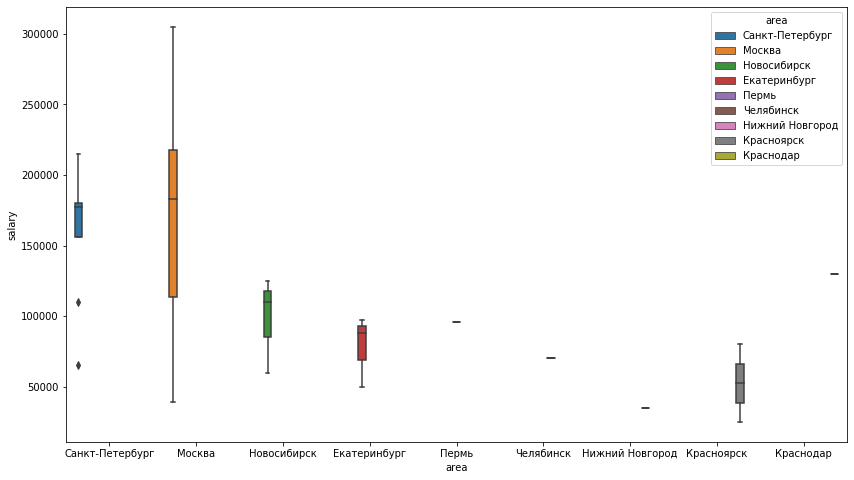

In [18]:
_, ax = plt.subplots(figsize=(14,8))
sns.boxplot(x='area', y='salary', data=compute_salary_df, hue='area', ax=ax)

#### Plot the median salary by experience on the boxplot

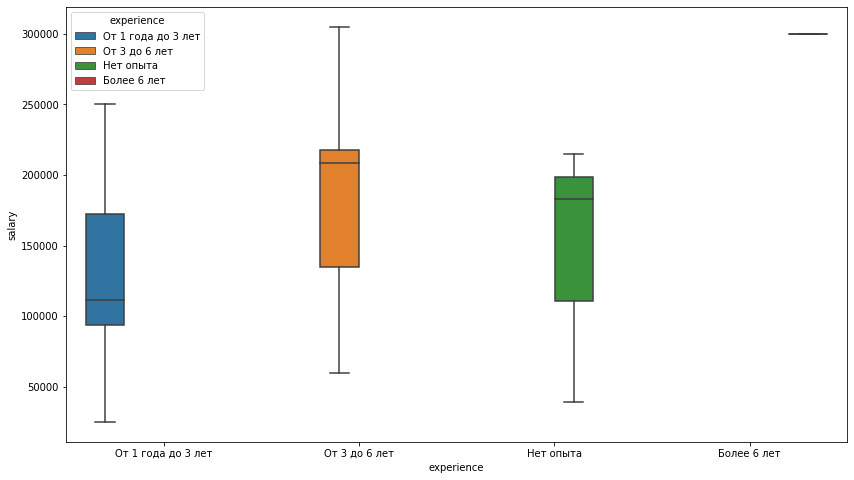

In [19]:
_, ax = plt.subplots(figsize=(14,8))
sns.boxplot(x='experience', y='salary', data=compute_salary_df, hue='experience', ax=ax)

#### Compute median salary for each biggest city

In [20]:
def compute_salary(rub_vacanices_list):
    vacancies_list = []
    for one_vacancie in rub_vacanices_list:
        if one_vacancie['gross'] == True:
            if (one_vacancie['from'] is not None) and (one_vacancie['to'] is not None):
                vacancies_list.append((one_vacancie['from']*0.87, one_vacancie['to']*0.87))
            elif (one_vacancie['from'] is None) and (one_vacancie['to'] is not None):
                vacancies_list.append(one_vacancie['to']*0.5*0.87)
            elif (one_vacancie['from'] is not None) and (one_vacancie['to'] is None):
                vacancies_list.append(one_vacancie['from']*0.87)
            else:
                pass
        else:
            if (one_vacancie['from'] is not None) and (one_vacancie['to'] is not None):
                vacancies_list.append((one_vacancie['from'], one_vacancie['to']))
            elif (one_vacancie['from'] is None) and (one_vacancie['to'] is not None):
                vacancies_list.append(one_vacancie['to']*0.5*0.87)
            elif (one_vacancie['from'] is not None) and (one_vacancie['to'] is None):
                vacancies_list.append(one_vacancie['from'])
            else:
                pass
    return list(map(np.median, vacancies_list))

In [21]:
def compute_median_salary_for_cities(cities_dict_df):
    salaries_city_dict = {}
    for city_label, city_df in cities_dict_df.items():
        salaries_data = city_df.salary.dropna()
        salary_list = compute_salary([ast.literal_eval(salaries_data.iloc[i]) for i in range(len(salaries_data)) if ast.literal_eval(salaries_data.iloc[i])['currency']=='RUR'])
        salaries_city_dict[city_label] = salary_list
        print(f'Median salary as Data Scientist in {city_label}: {round(np.mean(salary_list),2)} rub.')
    return salaries_city_dict

In [22]:
cities_salary_dict = compute_median_salary_for_cities(city_ds_data_dict)

Median salary as Data Scientist in Ekaterinburg: 78480.17 rub.


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Median salary as Data Scientist in Kazan: nan rub.
Median salary as Data Scientist in N.Novgorod: 34800.0 rub.
Median salary as Data Scientist in Novosibirsk: 98333.33 rub.
Median salary as Data Scientist in St.Petersburg: 159634.38 rub.
Median salary as Data Scientist in Moscow: 173719.23 rub.
